# Open the files as a stack

In [10]:
import xarray as xr

[_Reference_](https://stackoverflow.com/questions/64490785/open-mfdataset-with-xarray-failing-to-find-coordinates)

In [11]:
goes_c07_mfpath = r'./ABI/OR_ABI-L1b-RadC-M6C07_G16_*.nc'  # Filepath with wildcard
goes_c07 = xr.open_mfdataset(goes_c07_mfpath, concat_dim='t', combine='nested')

## Subset to Area

In [12]:
# Numbers here are the indexes from Clare
burn_area = goes_c07["Rad"][:, 473:480, 141:148]
burn_area

<xarray.DataArray 'Rad' (t: 13, y: 7, x: 7)>
dask.array<getitem, shape=(13, 7, 7), dtype=float32, chunksize=(1, 7, 7), chunktype=numpy.ndarray>
Coordinates:
  * t        (t) datetime64[ns] 2019-08-06T00:03:09.271015040 ... 2019-08-25T...
  * y        (y) float32 0.1017 0.1017 0.1016 0.1016 0.1015 0.1014 0.1014
  * x        (x) float32 -0.09344 -0.09338 -0.09332 ... -0.09316 -0.0931
    y_image  float32 0.08624
    x_image  float32 -0.03136
Attributes:
    long_name:              ABI L1b Radiances
    standard_name:          toa_outgoing_radiance_per_unit_wavenumber
    sensor_band_bit_depth:  14
    valid_range:            [    0 16382]
    units:                  mW m-2 sr-1 (cm-1)-1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF

# Doing Stuff with the subset

### Getting mean values over time

In [13]:
# mean value at each pixel across all time values
burn_area.mean("t")

<xarray.DataArray 'Rad' (y: 7, x: 7)>
dask.array<mean_agg-aggregate, shape=(7, 7), dtype=float32, chunksize=(7, 7), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float32 0.1017 0.1017 0.1016 0.1016 0.1015 0.1014 0.1014
  * x        (x) float32 -0.09344 -0.09338 -0.09332 ... -0.09316 -0.0931
    y_image  float32 0.08624
    x_image  float32 -0.03136

### Plotting

(array([ 23.,  60., 225.,   9.,  26.,  65.,  59., 111.,  54.,   5.]),
 array([0.30186418, 0.41981623, 0.5377683 , 0.65572035, 0.7736724 ,
        0.89162445, 1.0095766 , 1.1275285 , 1.2454807 , 1.3634326 ,
        1.4813848 ], dtype=float32),
 <BarContainer object of 10 artists>)

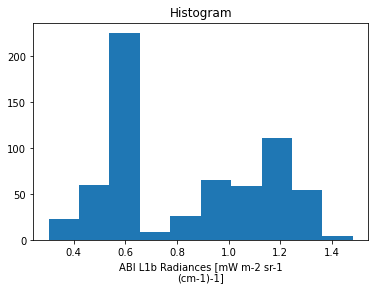

In [14]:
# Histogram of all values
burn_area.plot()

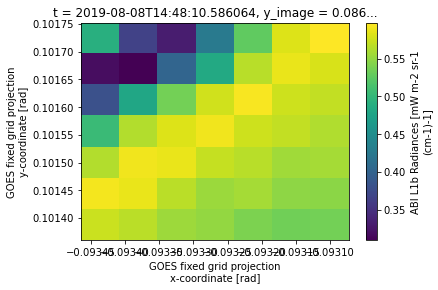

In [15]:
# Viewing a single time band
burn_area[5].plot()
# (The labels are a bit ugly but we can probs fix them)

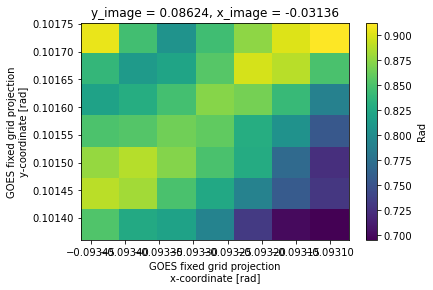

In [16]:
# plot the mean value of radiance over time
burn_area.mean('t').plot()

### Saving the data

In [17]:
# Save the area as a rastser
burn_area.rio.to_raster("./give_this_a_much_better_name.tif")

In [18]:
# Save the area as a rastser
burn_area.to_netcdf("./give_this_a_much_better_name.nc")
# (this gives a warning right now but we can probs fix it if we want to do this)

C:\Users\SARP Participant\.conda\envs\lessons\lib\site-packages\xarray\core\dataarray.py:2778: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  return dataset.to_netcdf(*args, **kwargs)
C:\Users\SARP Participant\.conda\envs\lessons\lib\site-packages\xarray\core\dataarray.py:2778: SerializationWarning: saving variable x with floating point data as an integer dtype without any _FillValue to use for NaNs
  return dataset.to_netcdf(*args, **kwargs)
